In [9]:
import logging
import pathlib

import pandas as pd

import llm_moral_values as llmv

logging.getLogger().setLevel(logging.INFO)

In [10]:
llmv.pipelines.ConductSurvey(
    iterations=50,
    models=llmv.schemas.Model.from_inference_selection(),
    survey=llmv.questionnaire.Survey(path=pathlib.Path("../../data/moral_foundations")),
    personas=llmv.schemas.Persona.from_directory(pathlib.Path("./personas/")),
    export_path=pathlib.Path("./data/"),
)()

INFO:root:> Conducting Survey
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:conservative
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:moderate
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:liberal
INFO:root:Generated 50 surveys for configuration: llama2:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama2:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama2:70b:liberal
INFO:root:Generated 50 surveys for configuration: llama3:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama3:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama3:70b:liberal
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:liberal
INFO:root:Generated 50 surveys for configuration: mistral:7b:conservative
INFO:root:Generated 50 surveys for 

In [11]:
dataset: llmv.data.Survey = llmv.data.Survey(data=pd.read_parquet("./data/survey.parquet"))
dataset.data

dimension  response
segment   id model       persona                         
agreement 1  llama3.1:8b liberal           harm       4.0
                         liberal           harm       4.0
                         liberal           harm       4.0
                         liberal           harm       4.0
                         liberal           harm       4.0
...                                         ...       ...
relevance 16 qwen2:72b   conservative    purity       5.0
                         conservative    purity       5.0
                         conservative    purity       5.0
                         conservative    purity       4.0
                         conservative    purity       5.0

[55029 rows x 2 columns]

In [12]:
dataset.data.groupby(["model", "persona"], observed=True).size()

model          persona     
llama3.1:8b    liberal         1600
               moderate        1600
               conservative    1600
llama2:70b     liberal         1591
               moderate        1599
               conservative    1600
llama3:70b     liberal         1600
               moderate        1600
               conservative    1600
llama3.1:70b   liberal         1600
               moderate        1600
               conservative    1600
mistral:7b     liberal         1597
               moderate        1598
               conservative    1420
mixtral:8x22b  liberal          914
               moderate         982
               conservative     890
mixtral:8x7b   liberal         1600
               moderate        1600
               conservative    1592
phi3:14b       liberal         1600
               moderate        1600
               conservative    1600
gemma:7b       liberal         1406
               moderate        1541
               conservative    1499


In [13]:
(dataset.data.groupby(["model", "persona", "dimension"], observed=True).mean().squeeze(axis=1))

model        persona       dimension
llama3.1:8b  liberal       authority    1.803333
                           catch        2.430000
                           fairness     4.000000
                           harm         4.070000
                           ingroup      2.043333
                                          ...   
qwen2:72b    conservative  catch        2.500000
                           fairness     3.500000
                           harm         3.283333
                           ingroup      2.890000
                           purity       3.173333
Name: response, Length: 216, dtype: float64

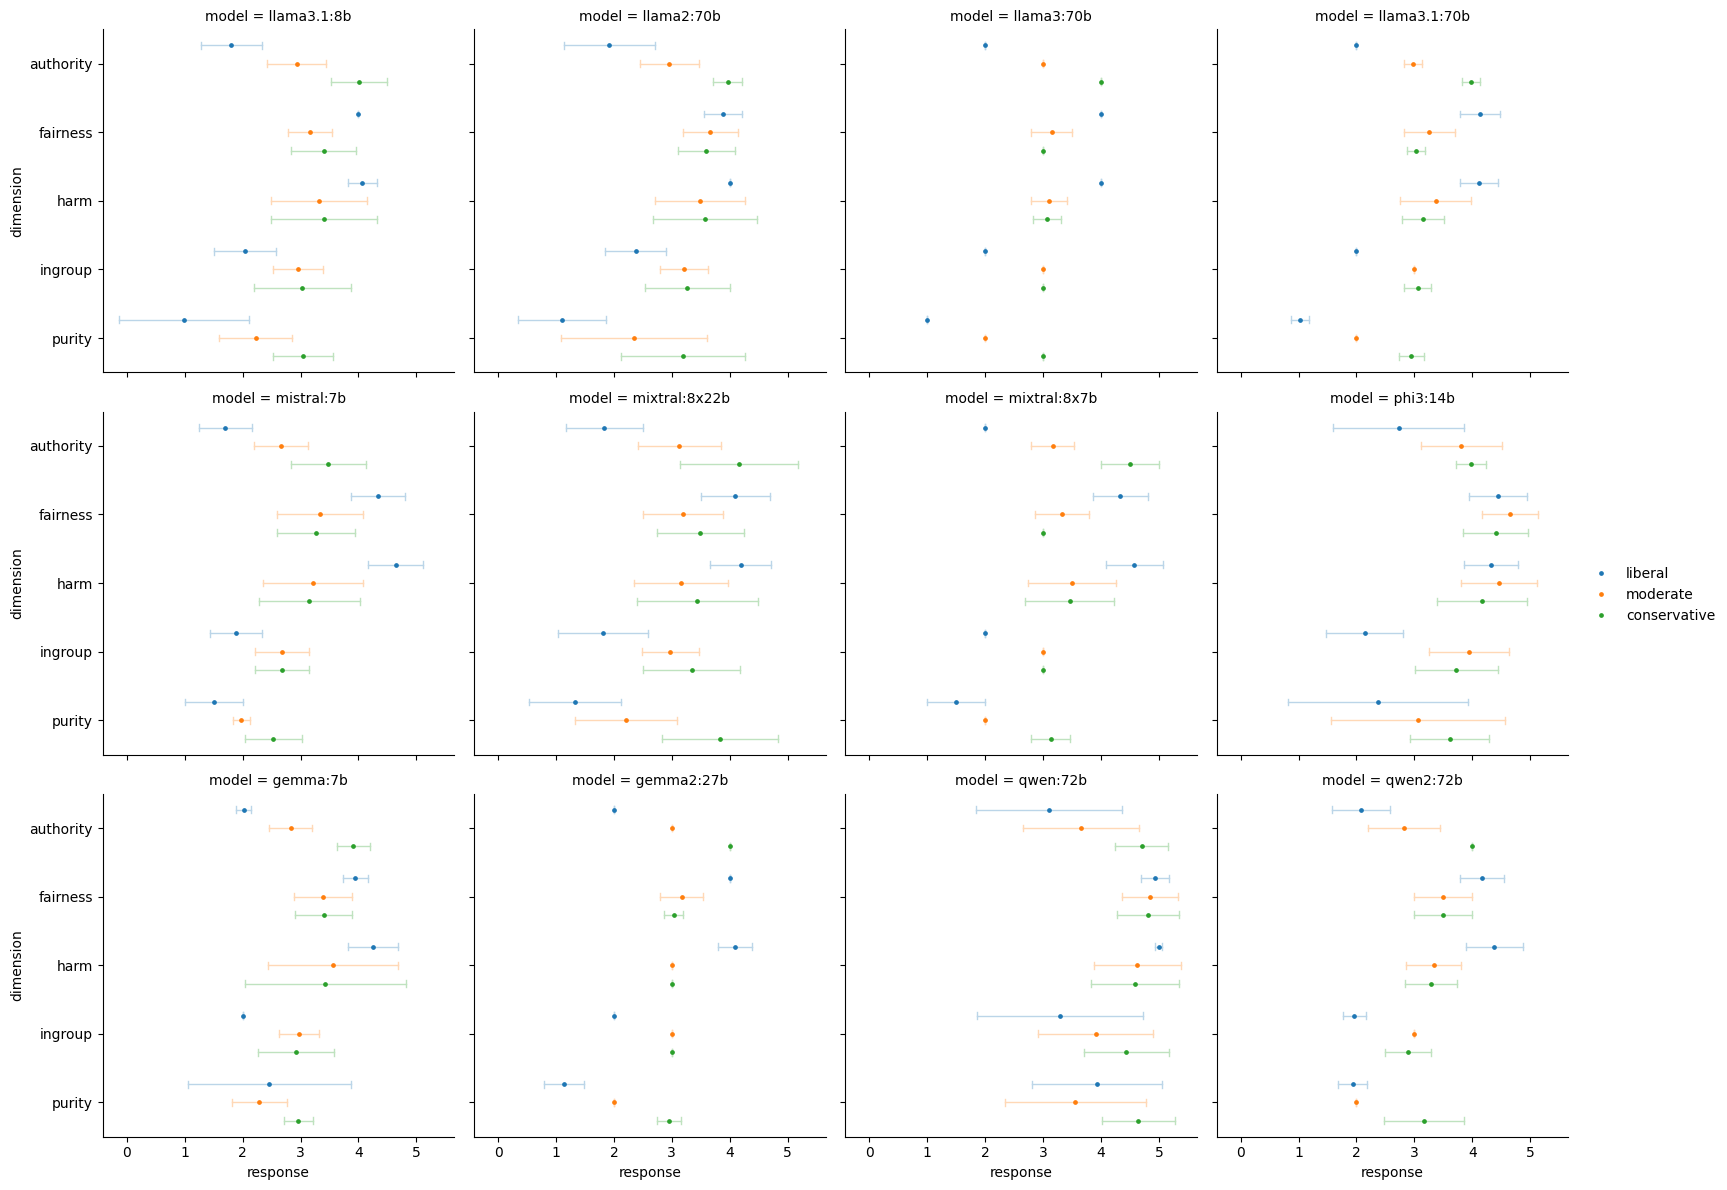

In [14]:
dataset.plot("./report/points.by.model_persona_dimension.pdf")

In [15]:
cross_evaluation: llmv.data.CrossEvaluation = llmv.data.CrossEvaluation(
    data=pd.read_parquet("./data/cross_evaluation.parquet")
)
cross_evaluation.data

sample                     anonymous                               us  \
group                        liberal  moderate conservative   liberal   
model         persona                                                   
llama3.1:8b   liberal       0.520000  0.818000     1.142000  0.208000   
              moderate      0.666667  0.484667     0.435333  0.766667   
              conservative  0.998000  0.488000     0.338667  1.098000   
llama2:70b    liberal       0.443317  0.693317     0.990494  0.195350   
              moderate      0.612230  0.364437     0.263104  0.712230   
              conservative  0.992000  0.482000     0.268667  1.092000   
llama3:70b    liberal       0.500000  0.770000     1.094000  0.200000   
              moderate      0.769333  0.579333     0.503333  0.789333   
              conservative  1.127333  0.617333     0.501333  1.227333   
llama3.1:70b  liberal       0.444667  0.814667     1.138667  0.244667   
              moderate      0.690667  0.500667     0.434000  0.710667   
              conservative  1.100667  0.610667     0.472000  1.200667   
mistral:7b    liberal       0.445327  0.950007     1.274007  0.460007   
              moderate      0.582886  0.576447     0.580447  0.593553   
              conservative  0.793783  0.600706     0.484706  0.893783   
mixtral:8x22b liberal       0.448964  0.831953     1.155953  0.273136   
              moderate      0.732637  0.549626     0.433626  0.832637   
              conservative  1.220024  0.710024     0.386024  1.320024   
mixtral:8x7b  liberal       0.348000  0.851333     1.175333  0.401333   
              moderate      0.687333  0.497333     0.381333  0.707333   
              conservative  1.175146  0.665146     0.496972  1.275146   
phi3:14b      liberal       0.245333  0.475333     0.799333  0.701333   
              moderate      0.884000  0.634000     0.766000  1.484000   
              conservative  0.910667  0.627333     0.623333  1.477333   
gemma:7b      liberal       0.269858  0.514258     0.837988  0.455327   
              moderate      0.568997  0.355820     0.370520  0.668997   
              conservative  0.932418  0.470645     0.354645  1.032418   
gemma2:27b    liberal       0.454667  0.760667     1.084667  0.190667   
              moderate      0.786000  0.596000     0.520000  0.806000   
              conservative  1.124667  0.633333     0.517333  1.224667   
qwen:72b      liberal       0.952000  0.702000     0.698000  1.552000   
              moderate      1.018667  0.768667     0.764667  1.618667   
              conservative  1.538667  1.288667     1.284667  2.138667   
qwen2:72b     liberal       0.248667  0.685333     1.009333  0.440667   
              moderate      0.616667  0.426667     0.424000  0.636667   
              conservative  0.996000  0.530000     0.344667  1.096000   

sample                                               korean            \
group                       moderate conservative   liberal  moderate   
model         persona                                                   
llama3.1:8b   liberal       0.778000     1.428000  0.668000  0.898000   
              moderate      0.196667     0.453333  0.374667  0.272667   
              conservative  0.528000     0.326000  0.658000  0.489333   
llama2:70b    liberal       0.626494     1.276494  0.548683  0.746494   
              moderate      0.264896     0.507770  0.397104  0.367104   
              conservative  0.648667     0.350667  0.758667  0.628667   
llama3:70b    liberal       0.730000     1.380000  0.620000  0.850000   
              moderate      0.299333     0.430667  0.489333  0.359333   
              conservative  0.657333     0.232667  0.767333  0.537333   
llama3.1:70b  liberal       0.774667     1.424667  0.664667  0.894667   
              moderate      0.220667     0.509333  0.417333  0.327333   
              conservative  0.630667     0.239333  0.740667  0.510667   
mistral:7b    liberal       0.910007     1.560007  0.8000

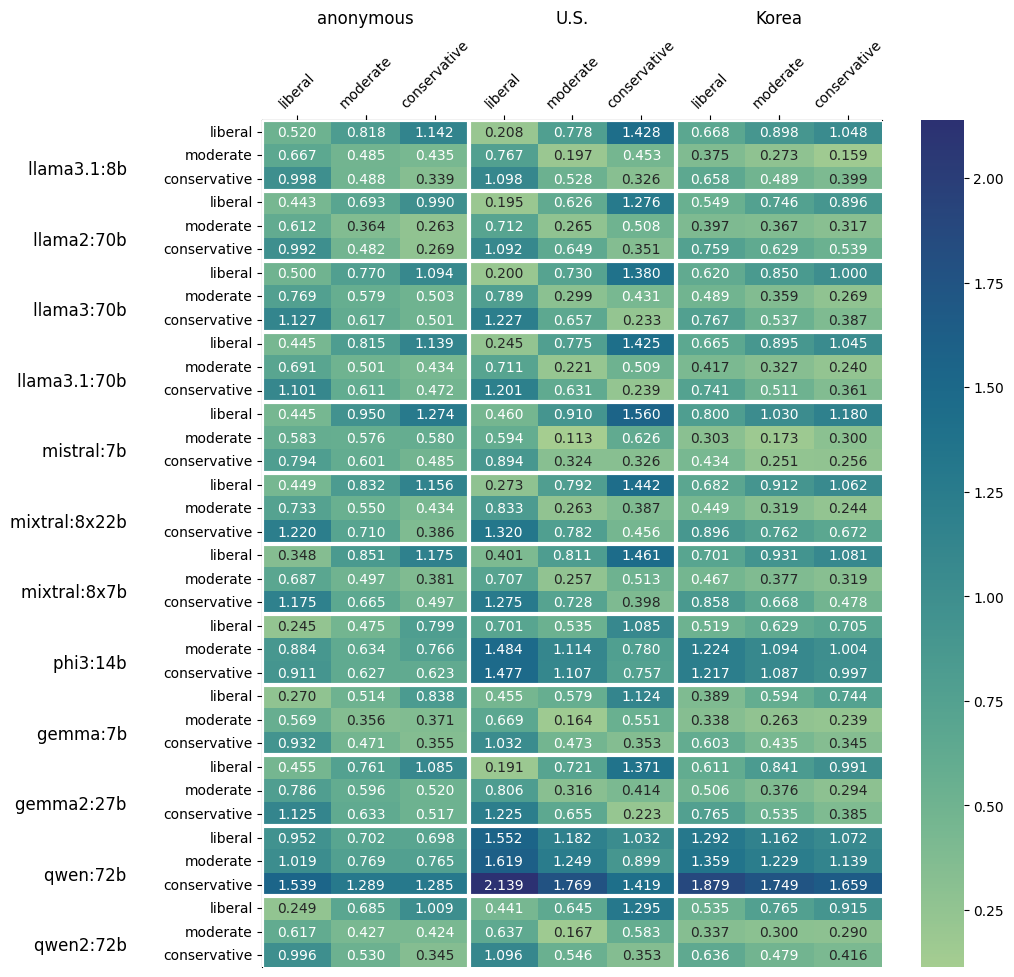

In [16]:
cross_evaluation.plot("./report/heat.cross_evaluation.pdf")